# Final Project Report

* Class: DS 5100
* Student Name:Alexandra Ferentinos
* Student Net ID:kzk8qq
* This URL: https://github.com/atferentinos/kzk8qq_ds5100_montecarlo/blob/main/FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/atferentinos/kzk8qq_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd

    # test function, needs to throw type error if not a NumPy Array

class Die:

    """
    A class, changing faces and weights.

    Attributes:
    - faces(N) (np.array): Array of faces of the die.
    - _data (pd.DataFrame): Private data frame that stores the die weights.
    """
    def __init__(self, N):
        """
        Initializes a Die with face data.

        Args:
        - faces(N) (np.array): Array of faces of the die..

        Raised errors:
        - TypeError: Throws a TypeError if not a Numpy array.
        - ValueError: Test to see if the values are distinct and raise ValueError if not.
        """
        if not isinstance(N, np.ndarray):
            raise TypeError("Not a Numpy Array!!")

        if len(N) != len(np.unique(N)):
            raise ValueError("Faces values must be unique!!")

        self._data = pd.DataFrame({'weights': [1.0]*len(N)}, index=N)
        
    def change_weight(self, N, new_weight):
        """
        A method to change the weight of a single side.

        Args:
        - face(N): face value to be changed.
        - new_weight: the weight of face value that was changed.

        Raises:
        - IndexError: If the face value is not valid.
        - TypeError: If weight is not numeric (interger or float) or castable numeric.
        """
        if N not in self._data.index:
            raise IndexError("Face value not valid!!")

        if not (isinstance(new_weight, (int, float)) or str(new_weight).isnumeric()):
            raise TypeError("Weight value is not numeric!!")

        self._data.loc[N, 'weights'] = new_weight
        
    def roll(self, rolls=1):
        """
        method to roll the die one or more times.

        Args:
        - how many times the die is to be rolled; defaults to  1

        Returns:
        - Returns a Python list of outcomes.
        """
        ##not to internally store results
        return np.random.choice(self._data.index, size=rolls, p=self._data['weights']/np.sum(self._data['weights'])).tolist()
    
    def current_state(self):
        """
        Dies current state

        Returns:
        - Returns a copy of the private die data frame.
        """
        return self._data.copy()      
        
#Game Class
class Game:
    """
    A game consists of rolling of one or more similar dice (Die objects) one or more times

    Attributes:
    - list of already instantiated similar dice.
    """
    ##Takes a single parameter, a list of already instantiated similar dice
    def __init__(self, dies):
        """
        Initializes a Die with face data. Takes a single parameter, a list of already instantiated similar dice

        Args:
        - takes a single parameter, a list of already instantiated similar dice.
        """
        self.dies = dies
        self._data = None
        
##play method how many times dice should be rolled 
    def play(self, rolls):
        """
       play method how many times dice should be rolled

        Args:
        - interger parameter how many times dice should be rolled. 
        """
        results = {}
        for idx, die in enumerate(self.dies):
            results[f'die_{idx}'] = die.roll(rolls)
        self._data = pd.DataFrame(results)
        
##results of most recent play
    def play_results(self, form='wide'):
        """
        results of most recent play

        Args:
        - Takes a parameter to return the data frame in narrow or wide form which defaults to wide form.

        Raises:
        - ValueError:if the user passes an invalid option for narrow or wide.
        """
        if form == 'wide':
            if self._data is None:
                return pd.DataFrame()
            return self._data.copy()
        elif form == 'narrow':
            if self._data is None:
                return pd.DataFrame()
            else:
                return self._data.melt(ignore_index=False, var_name='die_number', value_name='outcomes')
        else:
            raise ValueError("Invalid option passed, choose 'wide' or 'narrow'!!")

##Analyzer class, Throw a ValueError if the passed value is not a Game object
class Analyzer:
    """
    An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.

    Attributes:
    - game object as parameter
    
    Raises:
    ValueError:  if the passed value is not a Game object
    """
    def __init__(self, game):
        """
        Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object.

        Attributes:
        - game object as parameter
    
        Raises:
        ValueError:  if the passed value is not a Game object
        """
        if not isinstance(game, Game):
            raise ValueError("Passed value is not a Game Object!!")
        self.game = game
        
    ##jackpot method
    def jackpot(self):
        """
        A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die.

        Args:
        - Computes how many times the game resulted in a jackpot.

        Returns:
        -Returns an integer for the number of jackpots.
        """
        return self.game.play_results().eq(self.game.play_results().iloc[:, 0], axis=0).all(1).sum()
    
    ##facecounts method
    def rolled_event(self):
        """
        Computes how many times a given face is rolled in each event.

        Functions
        The data frame has an index of the roll number, face values as columns, and count values in the cells (i.e. it is in wide format)

        Returns:
        -Returns a data frame of results.
        """
        data = self.game.play_results()
        counts = data.apply(pd.Series.value_counts)
        #may need to fix for Nan
        return counts

    ##A combo count method
    def combo_faces(self):
        """
        Computes the distinct combinations of faces rolled, along with their counts.

        Combinations are order-independent and may contain repetitions.

        Returns:
        -Returns a data frame of results.
        """
        data = self.game.play_results()
        combos = data.apply(lambda row: tuple(row), axis=1).value_counts()
        return pd.DataFrame(combos, columns=['counts'])
    
    ##An permutation count method
    def distinct_permutations(self):
        """
        Computes the distinct permutations of faces rolled, along with their counts.

        The data frame should have a MultiIndex of distinct permutations and a column for the associated counts

        Returns:
        -Returns a data frame of results.
        """
        data = self.game.play_results()
        perms = data.apply(lambda row: ''.join(map(str, row)), axis=1).value_counts()
        return pd.DataFrame(perms, columns=['counts'])
```


## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import pandas as pd
import numpy as np

from Demo.montecarlo import Die, Game, Analyzer

class TestDieMethods(unittest.TestCase):
    def test_init_die(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        self.assertIsInstance(die.current_state(), pd.DataFrame)
        
    def test_change_weight(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        die.change_weight(1, 2.5)
        self.assertEqual(die.current_state().loc[1, 'weights'], 2.5)
        
    def test_roll(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        outcomes = die.roll(10)
        self.assertEqual(len(outcomes), 10)
        
    def test_current_state(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die = Die(test_faces)
        state = die.current_state()
        self.assertIsInstance(state, pd.DataFrame)

class TestGameMethods(unittest.TestCase):
    def test_init_game(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        self.assertIsInstance(game.dies, list)
        
    def test_play(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        self.assertIsNotNone(game.play_results())
        
    def test_play_results(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        results = game.play_results()
        self.assertIsInstance(results, pd.DataFrame)

class TestAnalyzerMethods(unittest.TestCase):
    def test_analyzer(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        
    def test_combo_faces(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        combos = analyzer.combo_faces()
        self.assertIsInstance(combos, pd.DataFrame)
        
    def test_rolled_event(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        counts = analyzer.rolled_event()
        self.assertIsInstance(counts, pd.DataFrame)
        
    def test_permutation_count(self):
        test_faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(test_faces)
        die2 = Die(test_faces)
        game = Game([die1, die2])
        game.play(5)
        analyzer = Analyzer(game)
        perms = analyzer.distinct_permutations()
        self.assertIsInstance(perms, pd.DataFrame)
        
if __name__ == '__main__':

    unittest.main(verbosity=3)
    ```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```bash
-bash-4.2$python montecarlo_test.py
Welcome to my MonteCarlo Final Project
test_analyzer (__main__.TestAnalyzerMethods) ... ok
test_combo_faces (__main__.TestAnalyzerMethods) ... ok
test_jackpot (__main__.TestAnalyzerMethods) ... ok
test_permutation_count (__main__.TestAnalyzerMethods) ... ok
test_rolled_event (__main__.TestAnalyzerMethods) ... ok
test_change_weight (__main__.TestDieMethods) ... ok
test_current_state (__main__.TestDieMethods) ... ok
test_init_die (__main__.TestDieMethods) ... ok
test_roll (__main__.TestDieMethods) ... ok
test_init_game (__main__.TestGameMethods) ... ok
test_play (__main__.TestGameMethods) ... ok
test_play_results (__main__.TestGameMethods) ... ok
----------------------------------------------------------------------
Ran 12 tests in 0.043s
OK
-bash-4.2$
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [2]:
import Demo.montecarlo

Welcome to my MonteCarlo Final Project


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [4]:
help(Demo.montecarlo)

Help on module Demo.montecarlo in Demo:

NAME
    Demo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer object takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  Attributes:
     |  - game object as parameter
     |  
     |  Raises:
     |  ValueError:  if the passed value is not a Game object
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Takes a game object as its input parameter. Throw a ValueError if the passed value is not a Game object.
     |      
     |      Attributes:
     |      - game object as parameter
     |      
     |      Raises:
     |      ValueError:  if the passed value is not a Game object
     |  
     |  combo_faces(self)
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      
     

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/atferentinos/kzk8qq_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```bash
-bash-4.2$cd kzk8qq_ds5100_montecarlo
-bash-4.2$!pip install -e .
pip install -e . install -e .
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/kzk8qq/Documents/MSDS/DS5100/kzk8qq_ds5100_montecarlo
Obtaining file:///sfs/qumulo/qhome/kzk8qq/Documents/MSDS/DS5100/kzk8qq_ds5100_montecarlo
Collecting install
  Downloading install-1.3.5-py3-none-any.whl (3.2 kB)
Requirement already satisfied: pandas in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (1.1.3)
Requirement already satisfied: numpy in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (1.19.2)
Requirement already satisfied: matplotlib in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from Demo==0.1) (3.3.2)
Requirement already satisfied: python-dateutil>=2.7.3 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from pandas->Demo==0.1) (2.8.1)
Requirement already satisfied: pytz>=2017.2 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from pandas->Demo==0.1) (2020.1)
Requirement already satisfied: certifi>=2020.06.20 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (2023.11.17)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (0.10.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (1.3.0)
Requirement already satisfied: pillow>=6.2.0 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from matplotlib->Demo==0.1) (8.0.1)
Requirement already satisfied: six>=1.5 in /sfs/applications/202307/software/standard/core/anaconda/2020.11-py3.8/lib/python3.8/site-packages (from python-dateutil>=2.7.3->pandas->Demo==0.1) (1.15.0)
Installing collected packages: install, Demo
  Attempting uninstall: Demo
    Found existing installation: Demo 0.1
    Uninstalling Demo-0.1:
      Successfully uninstalled Demo-0.1
  Running setup.py develop for Demo
Successfully installed Demo install-1.3.5
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [1]:
from Demo.montecarlo import Die, Game, Analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##creating the coins
fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)

Welcome to my MonteCarlo Final Project


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [2]:
##two fair coins game
fair_game = Game([fair_coin, fair_coin])
fair_game.play(1000)

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
##two unfair coins and one fair coin
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])
unfair_game.play(1000)

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [9]:
##raw frequencies of jackpots
fair_jackpots = Analyzer(fair_game).jackpot()
unfair_jackpots = Analyzer(unfair_game).jackpot()
print(fair_jackpots)
print(unfair_jackpots)

470
372


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [5]:
##relative frequency 
frequency_fair = fair_jackpots / 1000
frequency_unfair = unfair_jackpots / 1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

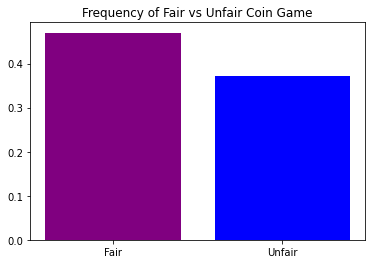

In [6]:
##Scenario 1 bar plot
plt.bar(x = ['Fair','Unfair'], height = [frequency_fair,frequency_unfair], color=['purple', 'blue'])
plt.title('Frequency of Fair vs Unfair Coin Game')
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
##create three dice
die_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die_3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
##convert one die to an unfair 
unfair_1 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_1.change_weight(6, 5)

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
##convert another die to be unfair 
unfair_2 = Die(np.array([1, 2, 3, 4, 5, 6]))
unfair_2.change_weight(1, 5)

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
##play 10000 with 5 fair dice 
fair_game_1 = Game([die_1, die_2, die_3, die_1, die_2])
fair_results = fair_game_1.play(10000)

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
##play 10000 with 2 unfair dice and 3 fair dice
unfair_game_1 = Game([unfair_1, unfair_2, die_1, die_2, die_3])
unfair_results = unfair_game_1.play(10000)

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

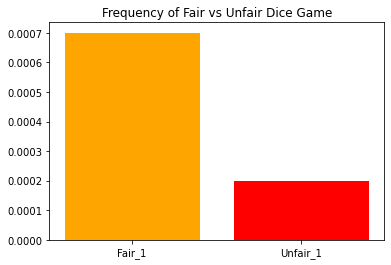

In [15]:
##Analyzer
fair_game_jackpots = Analyzer(fair_game_1).jackpot()
unfair_game_jackpots = Analyzer(unfair_game_1).jackpot()

frequency_fair_1 = fair_game_jackpots / 10000
frequency_unfair_1 = unfair_game_jackpots / 10000

plt.bar(x=['Fair_1', 'Unfair_1'], height=[frequency_fair_1, frequency_unfair_1], color=['orange', 'red'])
plt.title('Frequency of Fair vs Unfair Dice Game')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [16]:
##read data in 
letter_frequencies = {line[0]: float(line[1]) for line in map(str.split, open('data/english_letters.txt', 'r'))}

#frequency as weights
letter_dice = Die(np.array(list(letter_frequencies.keys())))

#weights based on frequencies
weights = np.array(list(letter_frequencies.values()))
for face, weight in zip(letter_dice._data.index, weights):
    letter_dice.change_weight(face, weight)

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [17]:
#4 dice and 1000 rolls
dice_4 = [letter_dice] * 4
game_4 = Game(dice_4)
game_4.play(1000)

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [18]:
#Analyze
analyze_4 = Analyzer(game_4)
perms_4 = analyze_4.distinct_permutations()

#Read Scrabble words
scrabble_words = set()
with open('data/scrabble_words.txt', 'r') as file:
    for line in file:
        scrabble_words.add(line.strip().upper())

#distinct permutations
english_4 = sum(word in scrabble_words for word in perms_4.index)

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

4 dice: 5.76% of permutations are English words.
5 dice: 0.60% of permutations are English words.
Game with 4 dice has a higher percentage of mutations


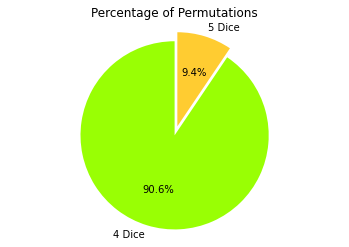

In [24]:
#Repeat
dice_5 = [letter_dice] * 5
game_5 = Game(dice_5)
game_5.play(1000)

analyze_5 = Analyzer(game_5)
perms_5 = analyze_5.distinct_permutations()

#Count  permutations
english_5 = sum(word in scrabble_words for word in perms_5.index)

#Compare
percent_4 = (english_4 / len(perms_4)) * 100
percent_5 = (english_5 / len(perms_5)) * 100

print(f"4 dice: {percent_4:.2f}% of permutations are English words.")
print(f"5 dice: {percent_5:.2f}% of permutations are English words.")
print("Game with 4 dice has a higher percentage of mutations")

#Pie chart comparing percentages
labels = ['4 Dice', '5 Dice']
sizes = [percent_4, percent_5]
colors = ['#99ff04', '#ffcc31']
explode = (0.1, 0)  #make slice out

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Percentage of Permutations')
plt.show()

# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.